<a href="https://colab.research.google.com/github/jgw0915/housePricePredict/blob/main/house_average_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import os.path
from sklearn.preprocessing import OneHotEncoder

In [2]:
# column_names = ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
column_names = ['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31','rps22']
replace_column_names = ['district', 'land_area', 'floors', 'building_type', 'building_area', 'room', 'hall', 'bathroom', 'main_building_area', 'balcony_area', 'elevator','price_per_square_meter']


In [3]:
# Get the current directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)
# Define the file path
data_file_path = os.path.join(parent_directory, 'data','不動產實價登錄資訊.csv')
df = pd.read_csv('/不動產實價登錄資訊.csv')
# filter out rps01(交易標的): 只保留有包含「房地」的
df = df[df['rps01'].str.contains('房地')]
# filter out rps11(建物型態 ): 只保留不包含「其他」的
df = df[~df['rps11'].str.contains('其他')]
# filter out rps12(主要用途): 只保留包含「住家用」的
df = df[df['rps12'].str.contains('住家用', na=False)]

# leave only rps22(單價平方公尺)
df_price = df['rps22']

df = df[column_names]

'''Remain columns before factorize'''
# # factorize district
# df['district_fac'] = pd.factorize(df['district'])[0]
# # factorize floors
# df['floors_fac'] = pd.factorize(df['rps09'])[0]
# # factorize building_type
# df['rbuilding_type_fac'] = pd.factorize(df['rps11'])[0]
# # factorize elevator
# df['elevator_fac'] = pd.factorize(df['rps31'])[0]

# # Replace column names to Engilsh
# df.columns = replace_column_names+['district_fac', 'floors_fac', 'building_type_fac', 'elevator_fac']

# # replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
# df_data = pd.DataFrame(df, columns=replace_column_names+['district_fac','floors_fac','building_type_fac','elevator_fac'])

'''Leave only columns after factorize'''
# factorize district
df['district'] = pd.factorize(df['district'])[0]
# factorize floors
df['rps09'] = pd.factorize(df['rps09'])[0]
# factorize building_type
df['rps11'] = pd.factorize(df['rps11'])[0]
# factorize elevator
df['rps31'] = pd.factorize(df['rps31'])[0]

# Replace column names to Engilsh
df.columns = replace_column_names

# replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
df_data = pd.DataFrame(df, columns=replace_column_names)
df_data['floors'][:20]



0      0
5      1
7      2
16     3
17     4
19     2
21     5
22     6
24     7
29     8
33     9
38     9
41    10
42    11
43    11
46     7
48    12
50     1
53    12
54    13
Name: floors, dtype: int64

In [4]:
'''One hot encoding'''
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the 'district' and 'building_type' columns
# encoded_features = encoder.fit_transform(df_data[['district', 'building_type']])

# # Convert the sparse matrix to a DataFrame and set the column names
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['district', 'building_type']))

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# df_data = pd.concat([df_data.drop(['district', 'building_type'], axis=1), encoded_df], axis=1)
# df_data

'One hot encoding'

In [5]:
df_data.isnull().any()

district                  False
land_area                 False
floors                    False
building_type             False
building_area             False
room                      False
hall                      False
bathroom                  False
main_building_area        False
balcony_area              False
elevator                  False
price_per_square_meter    False
dtype: bool

In [6]:
'''Remove One hot encoded columns'''
# columns_to_drop = ['district', 'floors', 'building_type', 'elevator']
# columns_to_drop = [col for col in columns_to_drop if col in df_data.columns]
# df_data = df_data.drop(columns=columns_to_drop)
# df_data

'Remove One hot encoded columns'

In [7]:

corr_matrix = df_data.corr(method="pearson")
corr_matrix


district  land_area    floors  building_type  \
district                1.000000   0.031955  0.004255      -0.045275   
land_area               0.031955   1.000000  0.009771       0.276789   
floors                  0.004255   0.009771  1.000000      -0.081278   
building_type          -0.045275   0.276789 -0.081278       1.000000   
building_area           0.059793   0.371421  0.114704      -0.198261   
room                    0.004645   0.171411 -0.011579       0.241936   
hall                    0.027240   0.125217 -0.007743       0.044055   
bathroom                0.020076   0.159179  0.010879       0.120858   
main_building_area      0.031657   0.513660  0.104601       0.248767   
balcony_area            0.061582   0.225313  0.004254      -0.112118   
elevator               -0.079364   0.173591 -0.035229       0.909937   
price_per_square_meter -0.350085  -0.054179  0.056646      -0.183118   

                        building_area      room      hall  bathroom  \
district                     0.059793  0.004645  0.027240  0.020076   
land_area                    0.371421  0.171411  0.125217  0.159179   
floors                       0.114704 -0.011579 -0.007743  0.010879   
building_type               -0.198261  0.241936  0.044055  0.120858   
building_area                1.000000  0.343191  0.289258  0.346186   
room                         0.343191  1.000000  0.428123  0.599169   
hall                         0.289258  0.428123  1.000000  0.209947   
bathroom                     0.346186  0.599169  0.209947  1.000000   
main_building_area           0.810853  0.460955  0.295683  0.399710   
balcony_area                 0.631193  0.256941  0.209994  0.245868   
elevator                    -0.256639  0.220157  0.023668  0.077514   
price_per_square_meter      -0.020453 -0.135529 -0.045434 -0.067167   

                        main_building_area  balcony_area  elevator  \
district                          0.031657      0.061582 -0.079364   
land_area                         0.513660      0.225313  0.173591   
floors                            0.104601      0.004254 -0.035229   
building_type                     0.248767     -0.112118  0.909937   
building_area                     0.810853      0.631193 -0.256639   
room                              0.460955      0.256941  0.220157   
hall                              0.295683      0.209994  0.023668   
bathroom                          0.399710      0.245868  0.077514   
main_building_area                1.000000      0.540262  0.171891   
balcony_area                      0.540262      1.000000 -0.168344   
elevator                          0.171891     -0.168344  1.000000   
price_per_square_meter           -0.118478     -0.100804 -0.153533   

                        price_per_square_meter  
district                             -0.350085  
land_area                            -0.054179  
floors                                0.056646  
building_type                        -0.183118  
building_area                        -0.020453  
room                                 -0.135529  
hall                                 -0.045434  
bathroom                             -0.067167  
main_building_area                   -0.118478  
balcony_area                         -0.100804  
elevator                             -0.153533  
price_per_square_meter                1.000000

In [8]:
corr_matrix['price_per_square_meter'].sort_values(ascending=False)

price_per_square_meter    1.000000
floors                    0.056646
building_area            -0.020453
hall                     -0.045434
land_area                -0.054179
bathroom                 -0.067167
balcony_area             -0.100804
main_building_area       -0.118478
room                     -0.135529
elevator                 -0.153533
building_type            -0.183118
district                 -0.350085
Name: price_per_square_meter, dtype: float64

Saving figure Correlation_plot (Price per Square Meter)


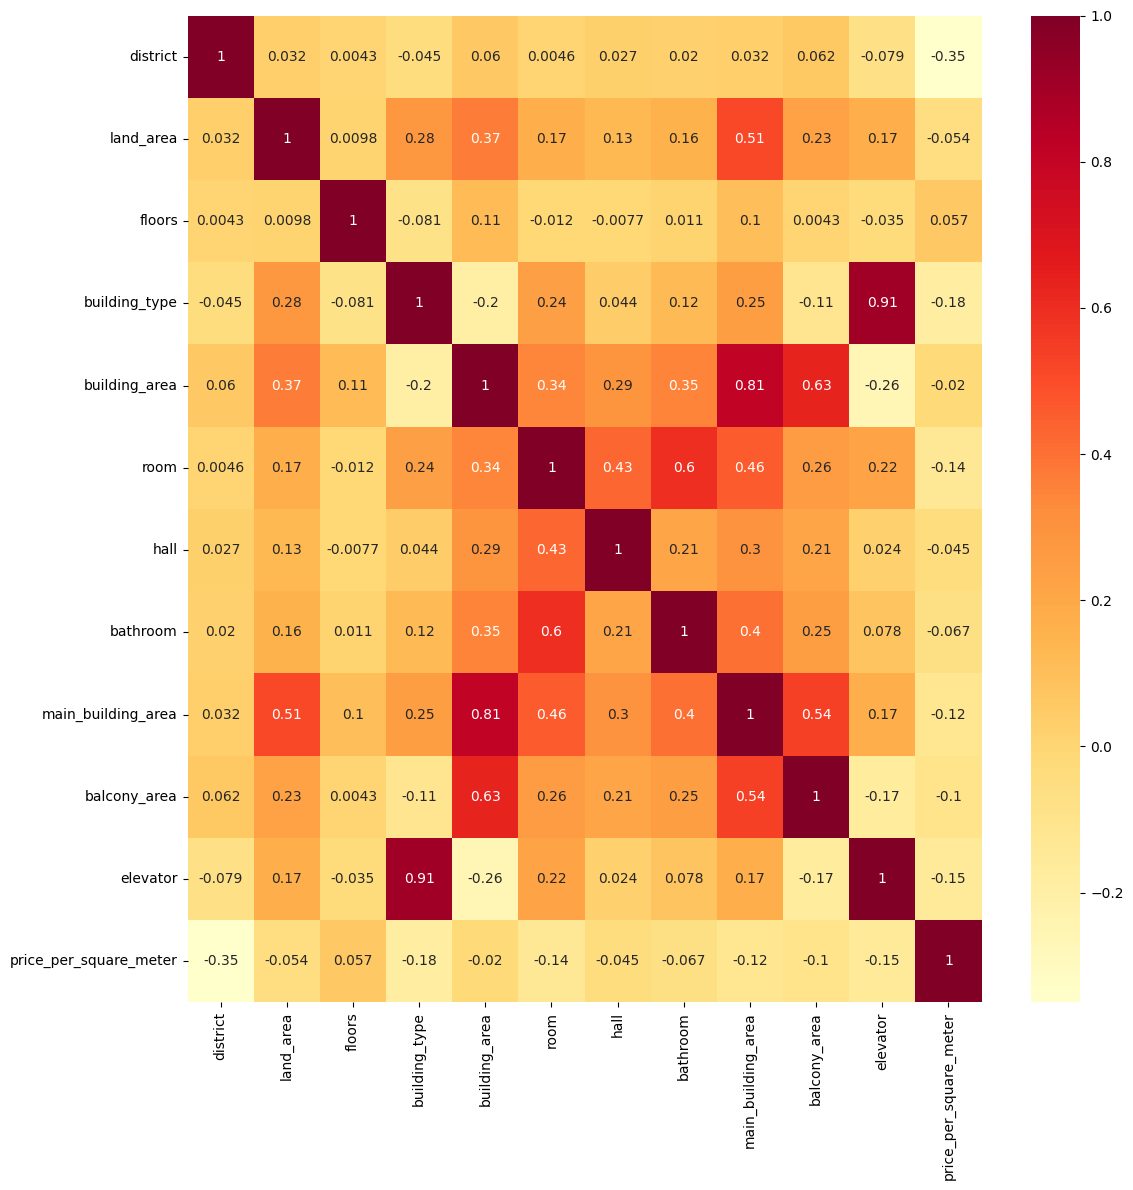

In [9]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

# Where to save the figures
PROJECT_ROOT_DIR = parent_directory
PLOT_IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Image", 'Plot')
os.makedirs(PLOT_IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PLOT_IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize= (len(df.columns), len(df.columns))) # 圖形大小
sns.heatmap(df_data.corr(),annot = True,cmap='YlOrRd') # 塗顏色
save_fig("Correlation_plot (Price per Square Meter)") # 儲存圖形
plt.show() # 顯示圖形

[-2814.96695691    25.10157605   112.49436707 -5860.90754877
   105.99364516 -3484.460418     970.98714401  1243.05600522
  -152.02396013  -889.88307306 -2118.92546228]
Saving figure LinearRegression_predict_vs_actual (Price per Square Meter)


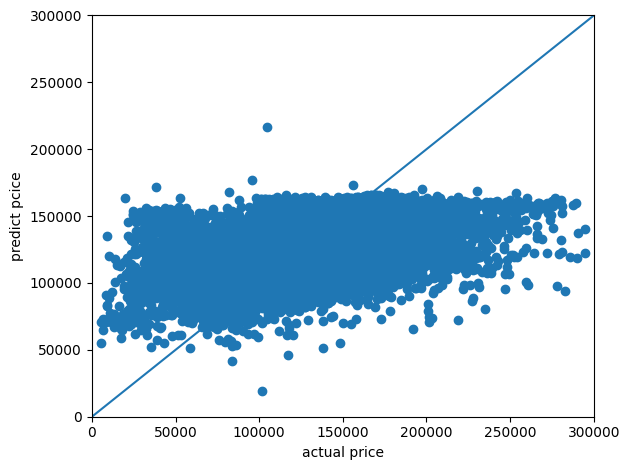

In [10]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # 將資料拿去訓練
print(lin_reg.coef_) # 顯示係數

y_predict = lin_reg.predict(x_test) # 北test的資料用訓練出來的模型去預測

# y_test = scaler.inverse_transform(y_test)
# y_predict_inverse = scaler.inverse_transform(y_predict)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("LinearRegression_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

'''Compute Model's error'''
housing_predictions = lin_reg.predict(x_test)
lin_rmse = mean_squared_error(y_test, housing_predictions,squared=False)
print('Linear regression RMSE:',lin_rmse)
mean = np.mean(np.abs(y_test - housing_predictions))
print("Linear regression MAE: {}".format(mean))

Linear regression RMSE: 42179.96904542174
Linear regression MAE: 31067.872972046465


In [12]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'LinearRegression (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(lin_reg,Model_path)

['/Model/LinearRegression (Price per Square Meter).pkl']

In [13]:
lin_reg.score(x_train, y_train) # 訓練模型的正確率

0.18738431576002867

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_price_normalized = pd.DataFrame(scaler.fit_transform(df_price.to_numpy().reshape(-1, 1)))

In [15]:
df_price_normalized

0
0     -0.091634
1      0.902611
2     -1.823907
3     -0.298960
4     -0.069203
...         ...
45278  0.946574
45279  0.687685
45280  0.714561
45281  0.659603
45282  0.761985

[45283 rows x 1 columns]

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
y = df_price_normalized # 房價數據
# y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

input_dim = 11

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, input_dim=input_dim, activation='relu'))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Neural Network (Price per Square Meter).h5'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

# Train the model
if os.path.exists(Model_path):
    model = tf.keras.models.load_model(Model_path)
else:
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    # Save Model
    model.save(Model_path)

# Make predictions
y_predict = model.predict(x_test)

Epoch 1/50
991/991 [==============================] - 3s 2ms/step - loss: 6.9957 - mae: 1.2256
Epoch 2/50
991/991 [==============================] - 2s 2ms/step - loss: 1.4918 - mae: 0.7708
Epoch 3/50
991/991 [==============================] - 2s 2ms/step - loss: 3.3407 - mae: 0.7609
Epoch 4/50
991/991 [==============================] - 2s 2ms/step - loss: 2.9539 - mae: 0.7075
Epoch 5/50
991/991 [==============================] - 2s 2ms/step - loss: 1.0355 - mae: 0.7245
Epoch 6/50
991/991 [==============================] - 2s 2ms/step - loss: 1.1019 - mae: 0.6909
Epoch 7/50
991/991 [==============================] - 2s 2ms/step - loss: 1.2727 - mae: 0.6905
Epoch 8/50
991/991 [==============================] - 2s 2ms/step - loss: 1.0987 - mae: 0.6871
Epoch 9/50
991/991 [==============================] - 2s 2ms/step - loss: 1.0130 - mae: 0.6731
Epoch 10/50
991/991 [==============================] - 2s 2ms/step - loss: 1.7839 - mae: 0.6696
Epoch 11/50
991/991 [============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


425/425 [==============================] - 1s 1ms/step


Saving figure neural_network_predict_vs_actual (Price per Square Meter)


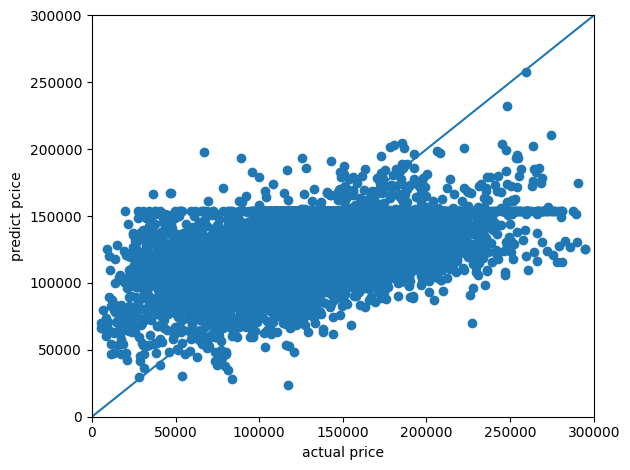

In [17]:
'''Plot NN prediction vs actual'''
y_predict_inverse = scaler.inverse_transform(y_predict)
y_test_inverse = scaler.inverse_transform(y_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test_inverse, y_predict_inverse) # 比對預測跟實際的差別
save_fig("neural_network_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

In [18]:
y_predict_inverse = scaler.inverse_transform(y_predict)

In [19]:
import numpy as np

'''Compute Model's error'''
nn_rmse = mean_squared_error(y_test_inverse, y_predict_inverse,squared=False)
print('Neural Network RMSE:',nn_rmse)
mean = np.mean(np.abs(y_test_inverse - y_predict_inverse))
print("Neural Network MAE: {}".format(mean))

Neural Network RMSE: 39680.25066598281
Neural Network MAE: 28961.44773158585


In [20]:
model.evaluate(x_train, y_train)


991/991 [==============================] - 1s 1ms/step - loss: 0.6937 - mae: 0.6275


[0.6936508417129517, 0.6275240778923035]

Saving figure DecisionTree_predict_vs_actual (Price per Square Meter)


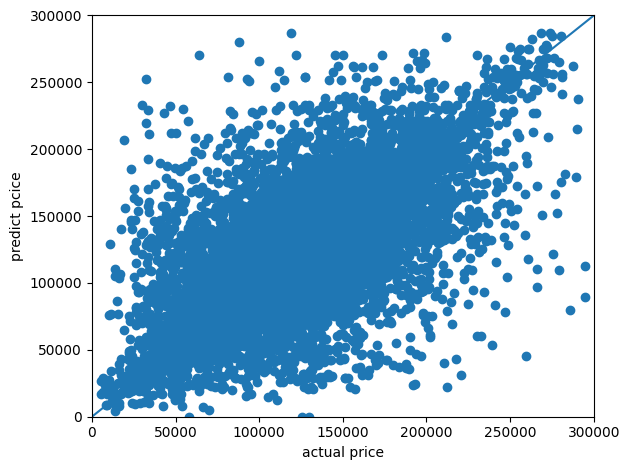

In [21]:
from sklearn.tree import DecisionTreeRegressor

x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

y_predict = tree_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("DecisionTree_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

In [22]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Decision Tree (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(tree_reg,Model_path)

['/Model/Decision Tree (Price per Square Meter).pkl']

In [23]:
import numpy as np

'''Compute Model's error'''
dt_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Decision Tree RMSE:',dt_reg_rmse)
mean = np.mean(np.abs(y_test - y_predict))
print("Decision Tree MAE: {}".format(mean))

Decision Tree RMSE: 37442.67656600753
Decision Tree MAE: 22341.890222978775


Saving figure Random_Forest_predict_vs_actual (Price per Square Meter)


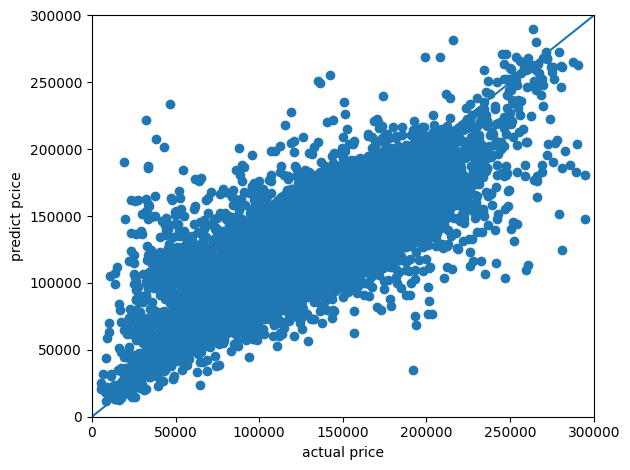

RandomForest RMSE: 28348.917431045036
RandomForest MAE: 16754.121140485506


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'RF_reg (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    RF_reg = joblib.load(Model_path)
else:
    RF_reg = RandomForestRegressor()
    RF_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(RF_reg,Model_path)

result = RF_reg.score(x_test, y_test)
y_predict = RF_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Random_Forest_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))

Saving figure Gradient_Boost_predict_vs_actual (Price per Square Meter)


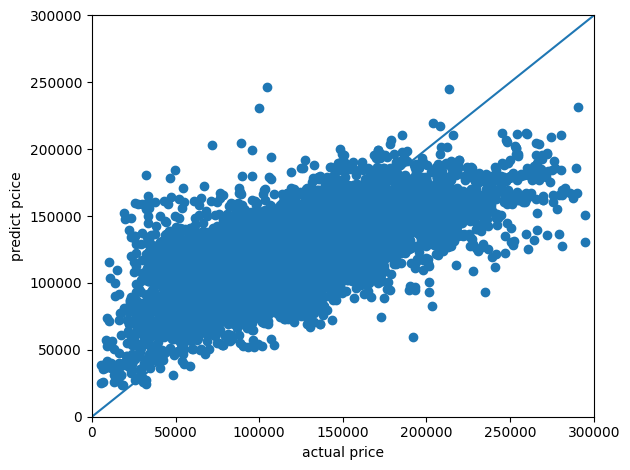

Gradient Boosting Regressor RMSE: 33021.320422645666
Gradient Boosting Regressor MAE: 22786.851772844733


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'GB_reg (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    GB_reg = joblib.load(Model_path)
else:
    GB_reg = GradientBoostingRegressor()
    GB_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(GB_reg,Model_path)

result = GB_reg.score(x_test, y_test)
y_predict = GB_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Gradient_Boost_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

GB_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Gradient Boosting Regressor RMSE:',GB_reg_rmse)
GB_reg_mean = np.mean(np.abs(y_test - y_predict))
print("Gradient Boosting Regressor MAE: {}".format(GB_reg_mean))

In [26]:
# from sklearn import svm

# # Create a SVM classifier with default parameters
# model_svc = svm.SVC()

# # Train the model using the training sets
# model_svc.fit(x_train, y_train)
# y_predict = model_svc.predict(x_test)

# plt.xlabel("actual price") # x軸的標題
# plt.ylabel("predict pcice") # y軸的標題
# plt.xlim(0, 300000) # x軸的範圍
# plt.ylim(0, 300000) # y軸的範圍
# plt.plot([0,300000], [0,300000]) # 劃一條基準線
# plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
# save_fig("SVM_predict_vs_actual (Price per Square Meter)") # 儲存圖形
# plt.show() # 察看結果

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Saving figure FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Grid Search)


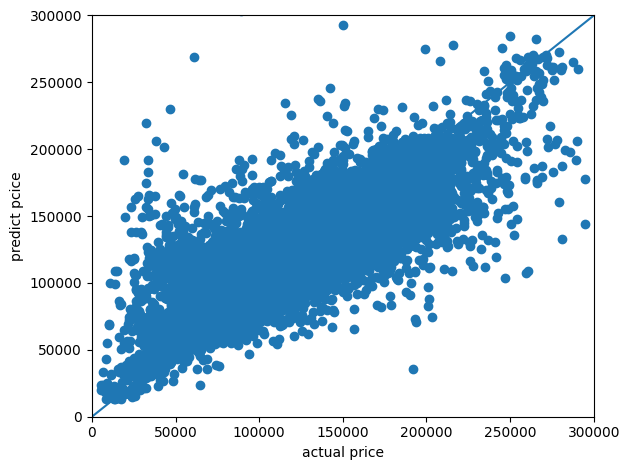

RandomForest RMSE: 28244.333468186705
RandomForest MAE: 16668.428556786082


In [59]:
'''Finetune Random Forest '''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100,125,150,175,200,300,400,500],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

# # Create a base model
# rf = RandomForestRegressor()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)
# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'FineTuned_RF_reg (Price per Square Meter,Grid Search).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

# if os.path.exists(Model_path):
#     RF_reg = joblib.load(Model_path)
#     print('Model Load Succesfully')
# else:
# Train a new model with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)
#save model
joblib.dump(best_rf,Model_path)

result = RF_reg.score(x_test, y_test)
y_predict = best_rf.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Grid Search)") # 儲存圖形
plt.show() # 察看結果

RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))


In [52]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

'''Randomized Search'''
def randomize_search_model(model):
    param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

    rnd_search = RandomizedSearchCV(model, param_distributions=param_distribs,
                                    n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)
    return rnd_search

rand_search = randomize_search_model(rf)
rand_search.fit(x_train, y_train)
best_params = rand_search.best_params_
print(best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'max_features': 7, 'n_estimators': 122}


{'max_features': 7, 'n_estimators': 122}
0.6317534831098968
Saving figure FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Randomized Search)


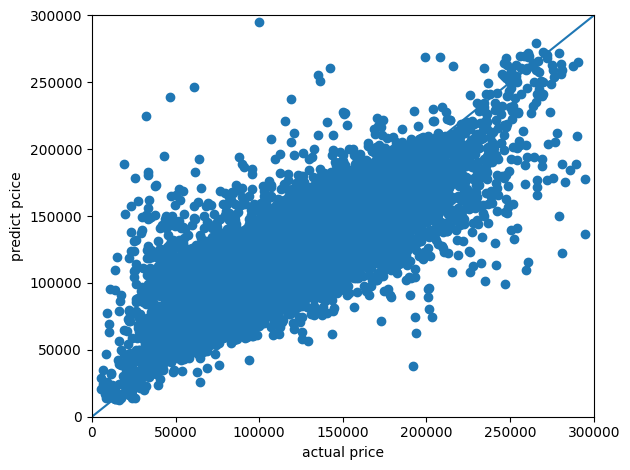

RandomForest RMSE: 28207.286619122122
RandomForest MAE: 16635.63275576215


In [62]:
'''Show Fine Tuned Model Result'''
# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'FineTuned_RF_reg (Price per Square Meter,Randomized Search).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
best_params = rand_search.best_params_
print(best_params)
# if os.path.exists(Model_path):
#     RF_reg = joblib.load(Model_path)
#     print('Model Load Succesfully')
# else:
# Train a new model with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(x_train, y_train)
#save model
joblib.dump(best_rf,Model_path)

result = best_rf.score(x_test, y_test)
print(result)
y_predict = best_rf.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Randomized Search)") # 儲存圖形
plt.show() # 察看結果

RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))